# Основные библиотеки.

In [ ]:
import numpy  as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive
from sklearn.metrics import classification_report
drive.mount('/content/drive')

Mounted at /content/drive


# Своя функция сравнения, загрузка таблицы, назначения класса типу вина.

In [ ]:
def score_(y, pred):
  right = 0
  for i in range(len(y)):
    if (np.abs(y.iloc[i] - pred[i]) <= 1):
      right += 1
  return right / len(y)

In [ ]:
# Input variables (based on physicochemical tests):
# 1 - fixed acidity (фиксированная кислотность)
# 2 - volatile acidity (летучая кислотность)
# 3 - citric acid (лимонная кислота)
# 4 - residual sugar (остаточный сахар)
# 5 - chlorides (хлориды)
# 6 - free sulfur dioxide (свободный диоксид серы)
# 7 - total sulfur dioxide (общий диоксид серы)
# 8 - density (плотность)
# 9 - pH (относительная кислотность по отношению к щелочности)
# 10 - sulphates (сульфаты)
# 11 - alcohol (алкоголь)
# Output variable (based on sensory data):
# 12 - quality (score between 0 and 10)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/winequalityN.csv', header = None)
Columns = df.iloc[0]
Columns[0] = 'class'
df = df.set_axis(Columns, axis = 1, inplace = False)
df = df.drop([0]) # Дропнули столбец с названиями.
df

0     class fixed acidity volatile acidity citric acid residual sugar  \
1     white             7             0.27        0.36           20.7   
2     white           6.3              0.3        0.34            1.6   
3     white           8.1             0.28         0.4            6.9   
4     white           7.2             0.23        0.32            8.5   
5     white           7.2             0.23        0.32            8.5   
...     ...           ...              ...         ...            ...   
6493    red           6.2              0.6        0.08              2   
6494    red           5.9             0.55         0.1            2.2   
6495    red           6.3             0.51        0.13            2.3   
6496    red           5.9            0.645        0.12              2   
6497    red             6             0.31        0.47            3.6   

0    chlorides free sulfur dioxide total sulfur dioxide  density    pH  \
1        0.045                  45                  170    1.001     3   
2        0.049                  14                  132    0.994   3.3   
3         0.05                  30                   97   0.9951  3.26   
4        0.058                  47                  186   0.9956  3.19   
5        0.058                  47                  186   0.9956  3.19   
...        ...                 ...                  ...      ...   ...   
6493      0.09                  32                   44   0.9949  3.45   
6494     0.062                  39                   51  0.99512  3.52   
6495     0.076                  29                   40  0.99574  3.42   
6496     0.075                  32                   44  0.99547  3.57   
6497     0.067                  18                   42  0.99549  3.39   

0    sulphates alcohol quality  
1         0.45     8.8       6  
2         0.49     9.5       6  
3         0.44    10.1       6  
4          0.4     9.9       6  
5          0.4     9.9       6  
...        ...     ...     ...  
6493      0.58    10.5       5  
6494       NaN    11.2       6  
6495      0.75      11       6  
6496      0.71    10.2       5  
6497      0.66      11       6  

[6497 rows x 13 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 6497 non-null   object
 1   fixed acidity         6487 non-null   object
 2   volatile acidity      6489 non-null   object
 3   citric acid           6494 non-null   object
 4   residual sugar        6495 non-null   object
 5   chlorides             6495 non-null   object
 6   free sulfur dioxide   6497 non-null   object
 7   total sulfur dioxide  6497 non-null   object
 8   density               6497 non-null   object
 9   pH                    6488 non-null   object
 10  sulphates             6493 non-null   object
 11  alcohol               6497 non-null   object
 12  quality               6497 non-null   object
dtypes: object(13)
memory usage: 710.6+ KB


# Изменение типов данных, поскольку все string'овое + df_with_dummies.

In [ ]:
# object -> float
for i in df.columns:
    if i != 'class':
        df[i] = df[i].astype(float)
    else:
        df[i] = df[i].convert_dtypes()
df = df.dropna()
df.info() # 34 значения с NaN'ом? В пекло их.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 1 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 6463 non-null   string 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   float64
dtypes: float64(12), string(1)
memory usage: 706.9 KB


In [ ]:
df.describe()

0      fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

0        chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992330   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.997000   
max       0.611000           289.000000            440.000000     1.038980   

0               pH    sulphates      alcohol      quality  
count  6463.000000  6463.000000  6463.000000  6463.000000  
mean      3.218332     0.531150    10.492825     5.818505  
std       0.160650     0.148913     1.193128     0.873286  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [ ]:
df_with_dummies = df.copy()
df_with_dummies['class'] = sklearn.preprocessing.LabelEncoder().fit_transform(df_with_dummies['class']) 
# white := 1, red := 0
df_with_dummies

0     class  fixed acidity  volatile acidity  citric acid  residual sugar  \
1         1            7.0             0.270         0.36            20.7   
2         1            6.3             0.300         0.34             1.6   
3         1            8.1             0.280         0.40             6.9   
4         1            7.2             0.230         0.32             8.5   
5         1            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492      0            6.8             0.620         0.08             1.9   
6493      0            6.2             0.600         0.08             2.0   
6495      0            6.3             0.510         0.13             2.3   
6496      0            5.9             0.645         0.12             2.0   
6497      0            6.0             0.310         0.47             3.6   

0     chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1         0.045                 45.0                 170.0  1.00100  3.00   
2         0.049                 14.0                 132.0  0.99400  3.30   
3         0.050                 30.0                  97.0  0.99510  3.26   
4         0.058                 47.0                 186.0  0.99560  3.19   
5         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.068                 28.0                  38.0  0.99651  3.42   
6493      0.090                 32.0                  44.0  0.99490  3.45   
6495      0.076                 29.0                  40.0  0.99574  3.42   
6496      0.075                 32.0                  44.0  0.99547  3.57   
6497      0.067                 18.0                  42.0  0.99549  3.39   

0     sulphates  alcohol  quality  
1          0.45      8.8      6.0  
2          0.49      9.5      6.0  
3          0.44     10.1      6.0  
4          0.40      9.9      6.0  
5          0.40      9.9      6.0  
...         ...      ...      ...  
6492       0.82      9.5      6.0  
6493       0.58     10.5      5.0  
6495       0.75     11.0      6.0  
6496       0.71     10.2      5.0  
6497       0.66     11.0      6.0  

[6463 rows x 13 columns]

# Распределения, корреляция.

In [ ]:
# Увеличим дефолтный размер графиков.
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

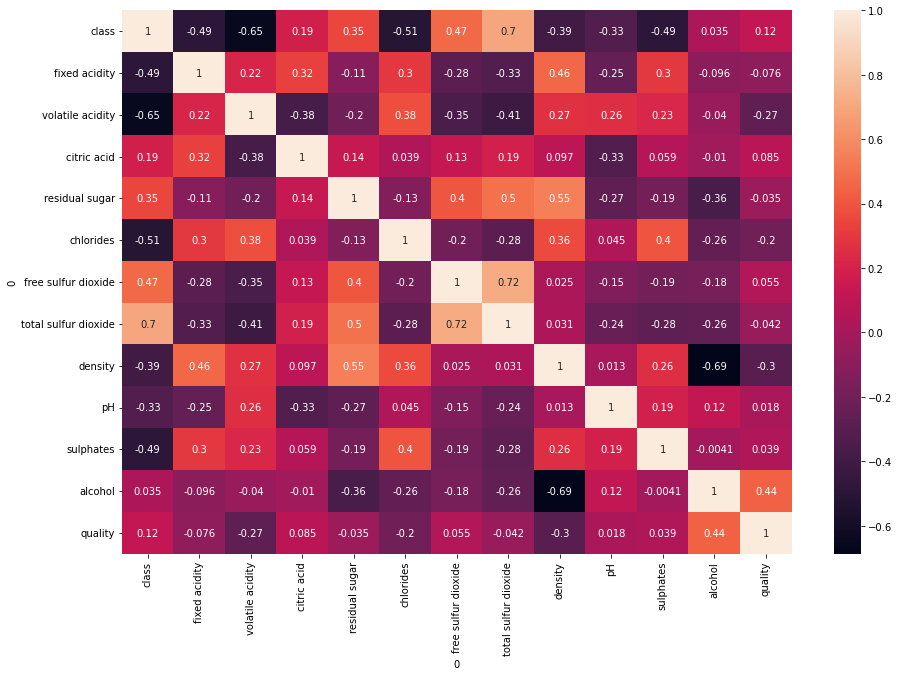

In [ ]:
corr_matrix = df_with_dummies.corr(method ='pearson')
sns.heatmap(data = corr_matrix, annot = True)
# Признаки сильно коррелируют друг с другом.

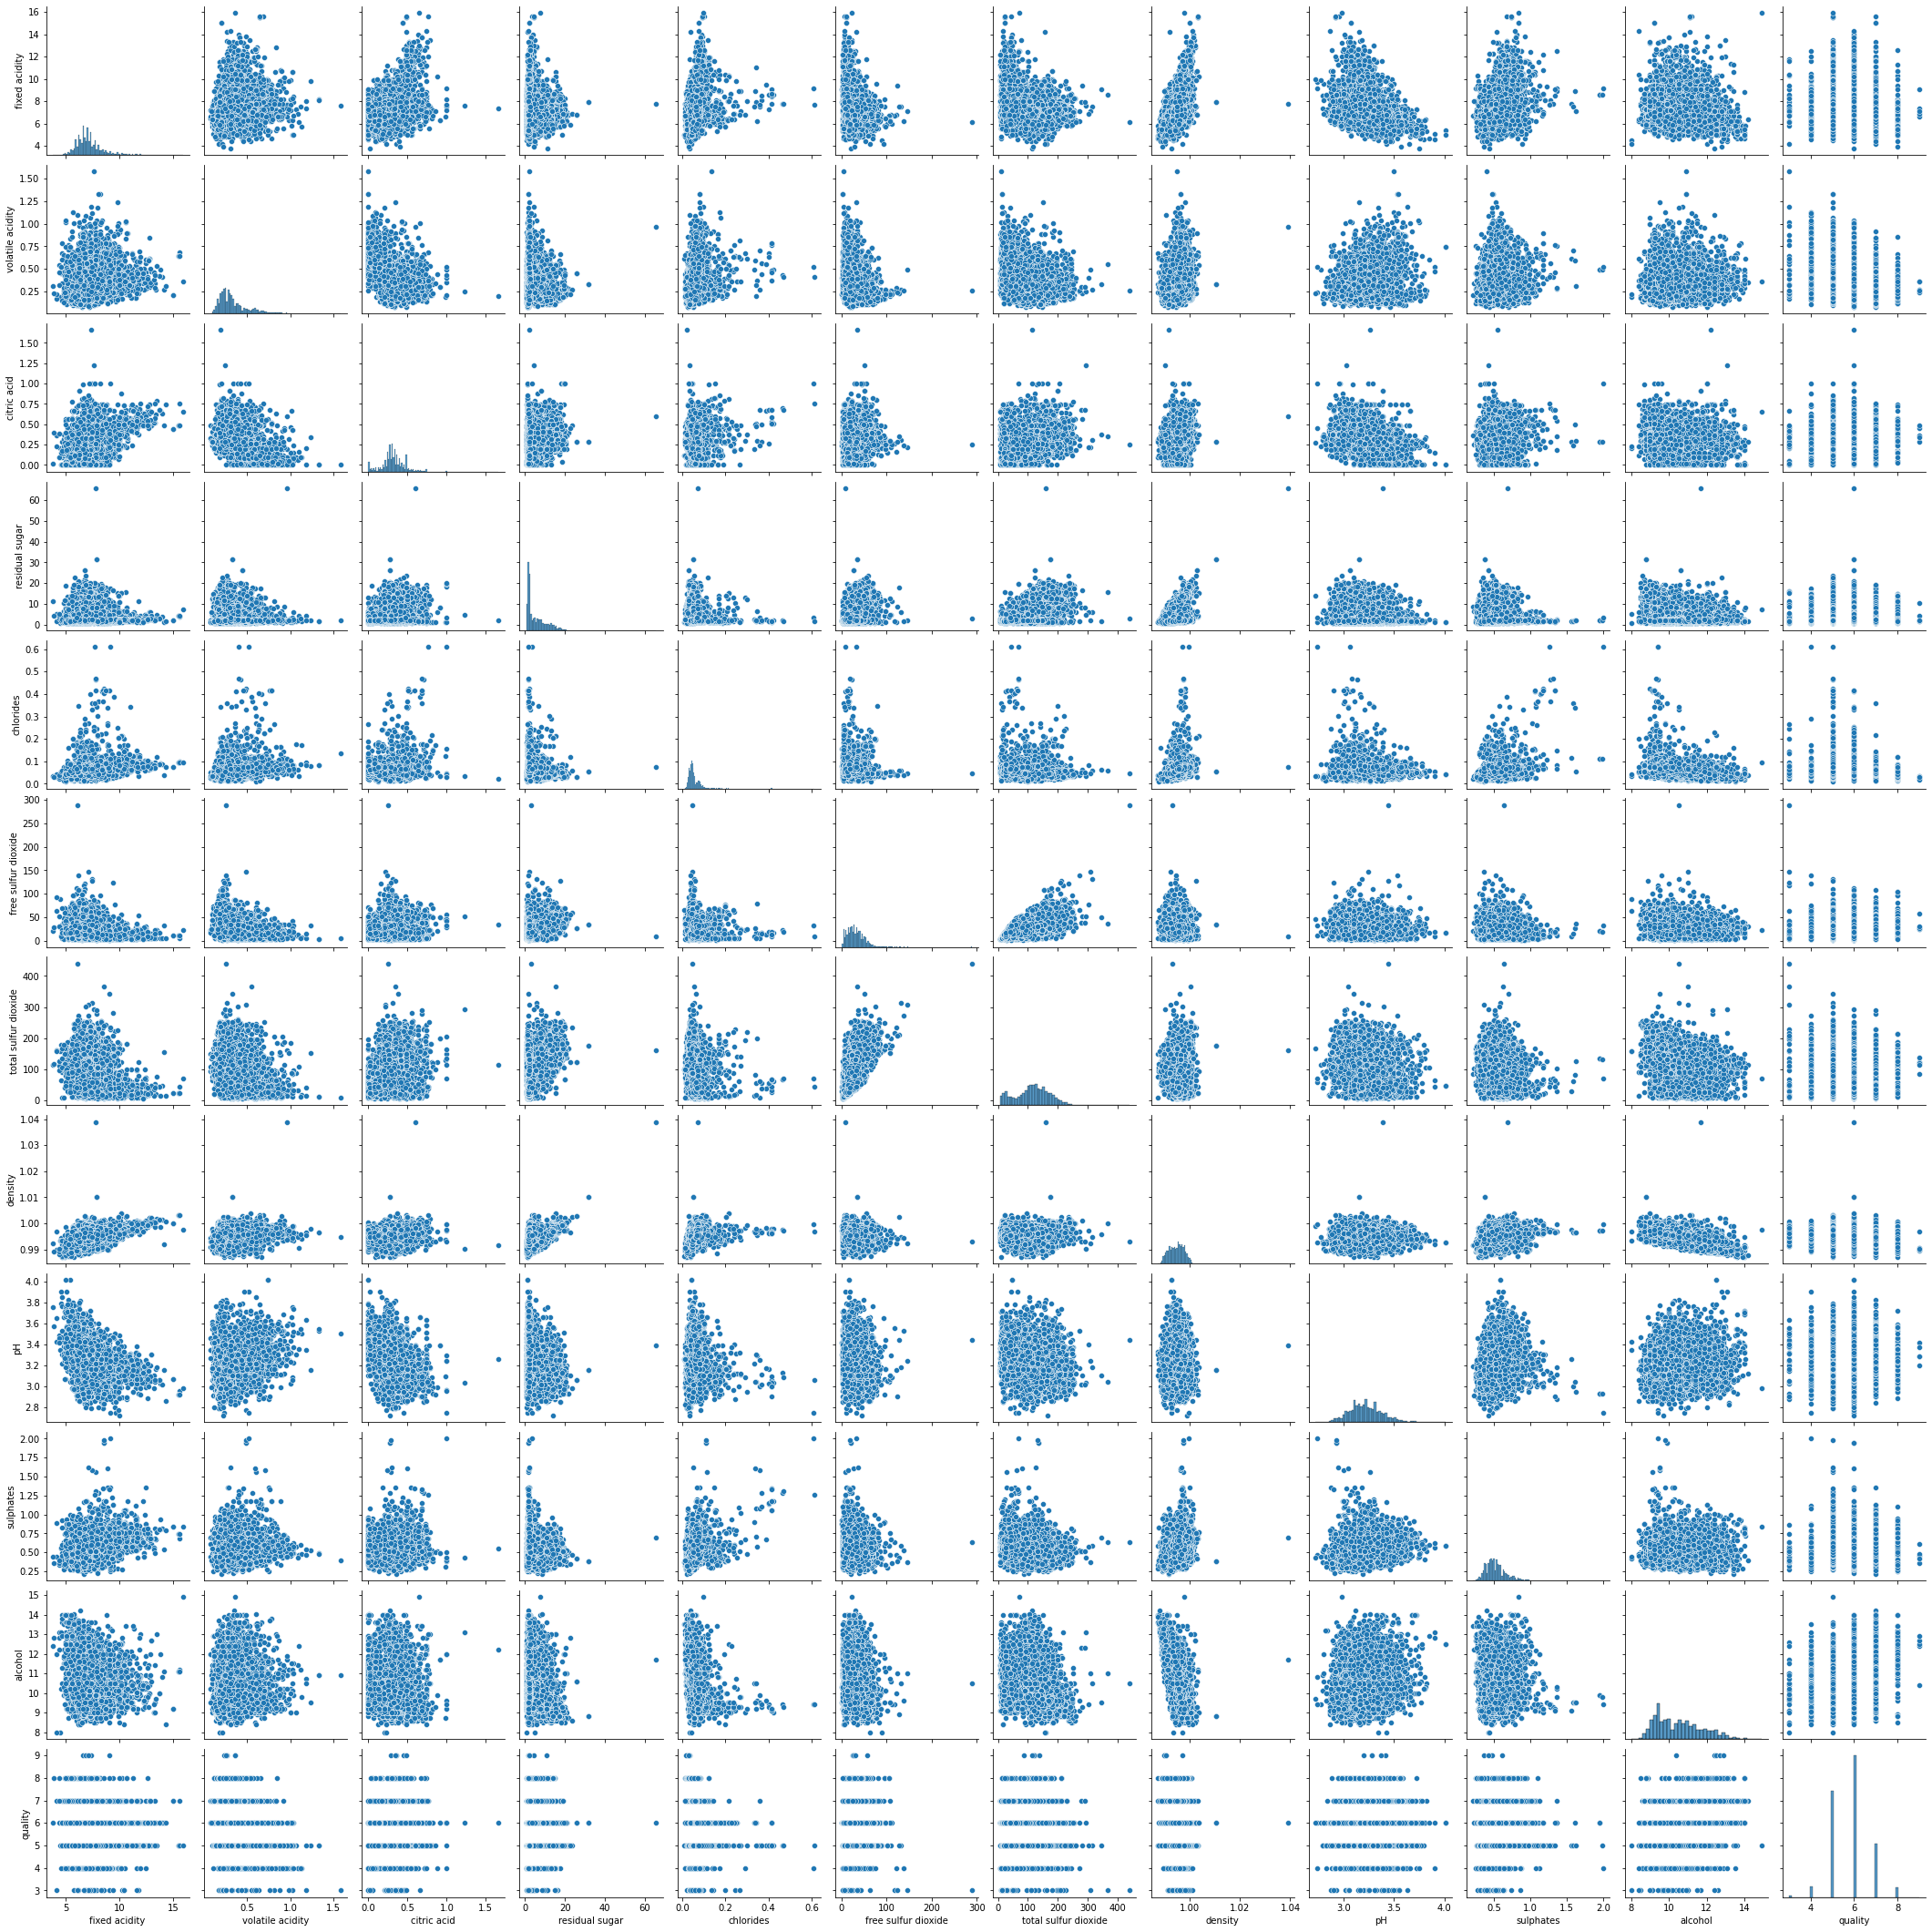

In [ ]:
sns.pairplot(data=df)

In [ ]:
# Данные без выбросов.
z = np.abs(stats.zscore(df_with_dummies.drop('quality', axis = 1)))
df_ = df_with_dummies[(z < 3).all(axis=1)]

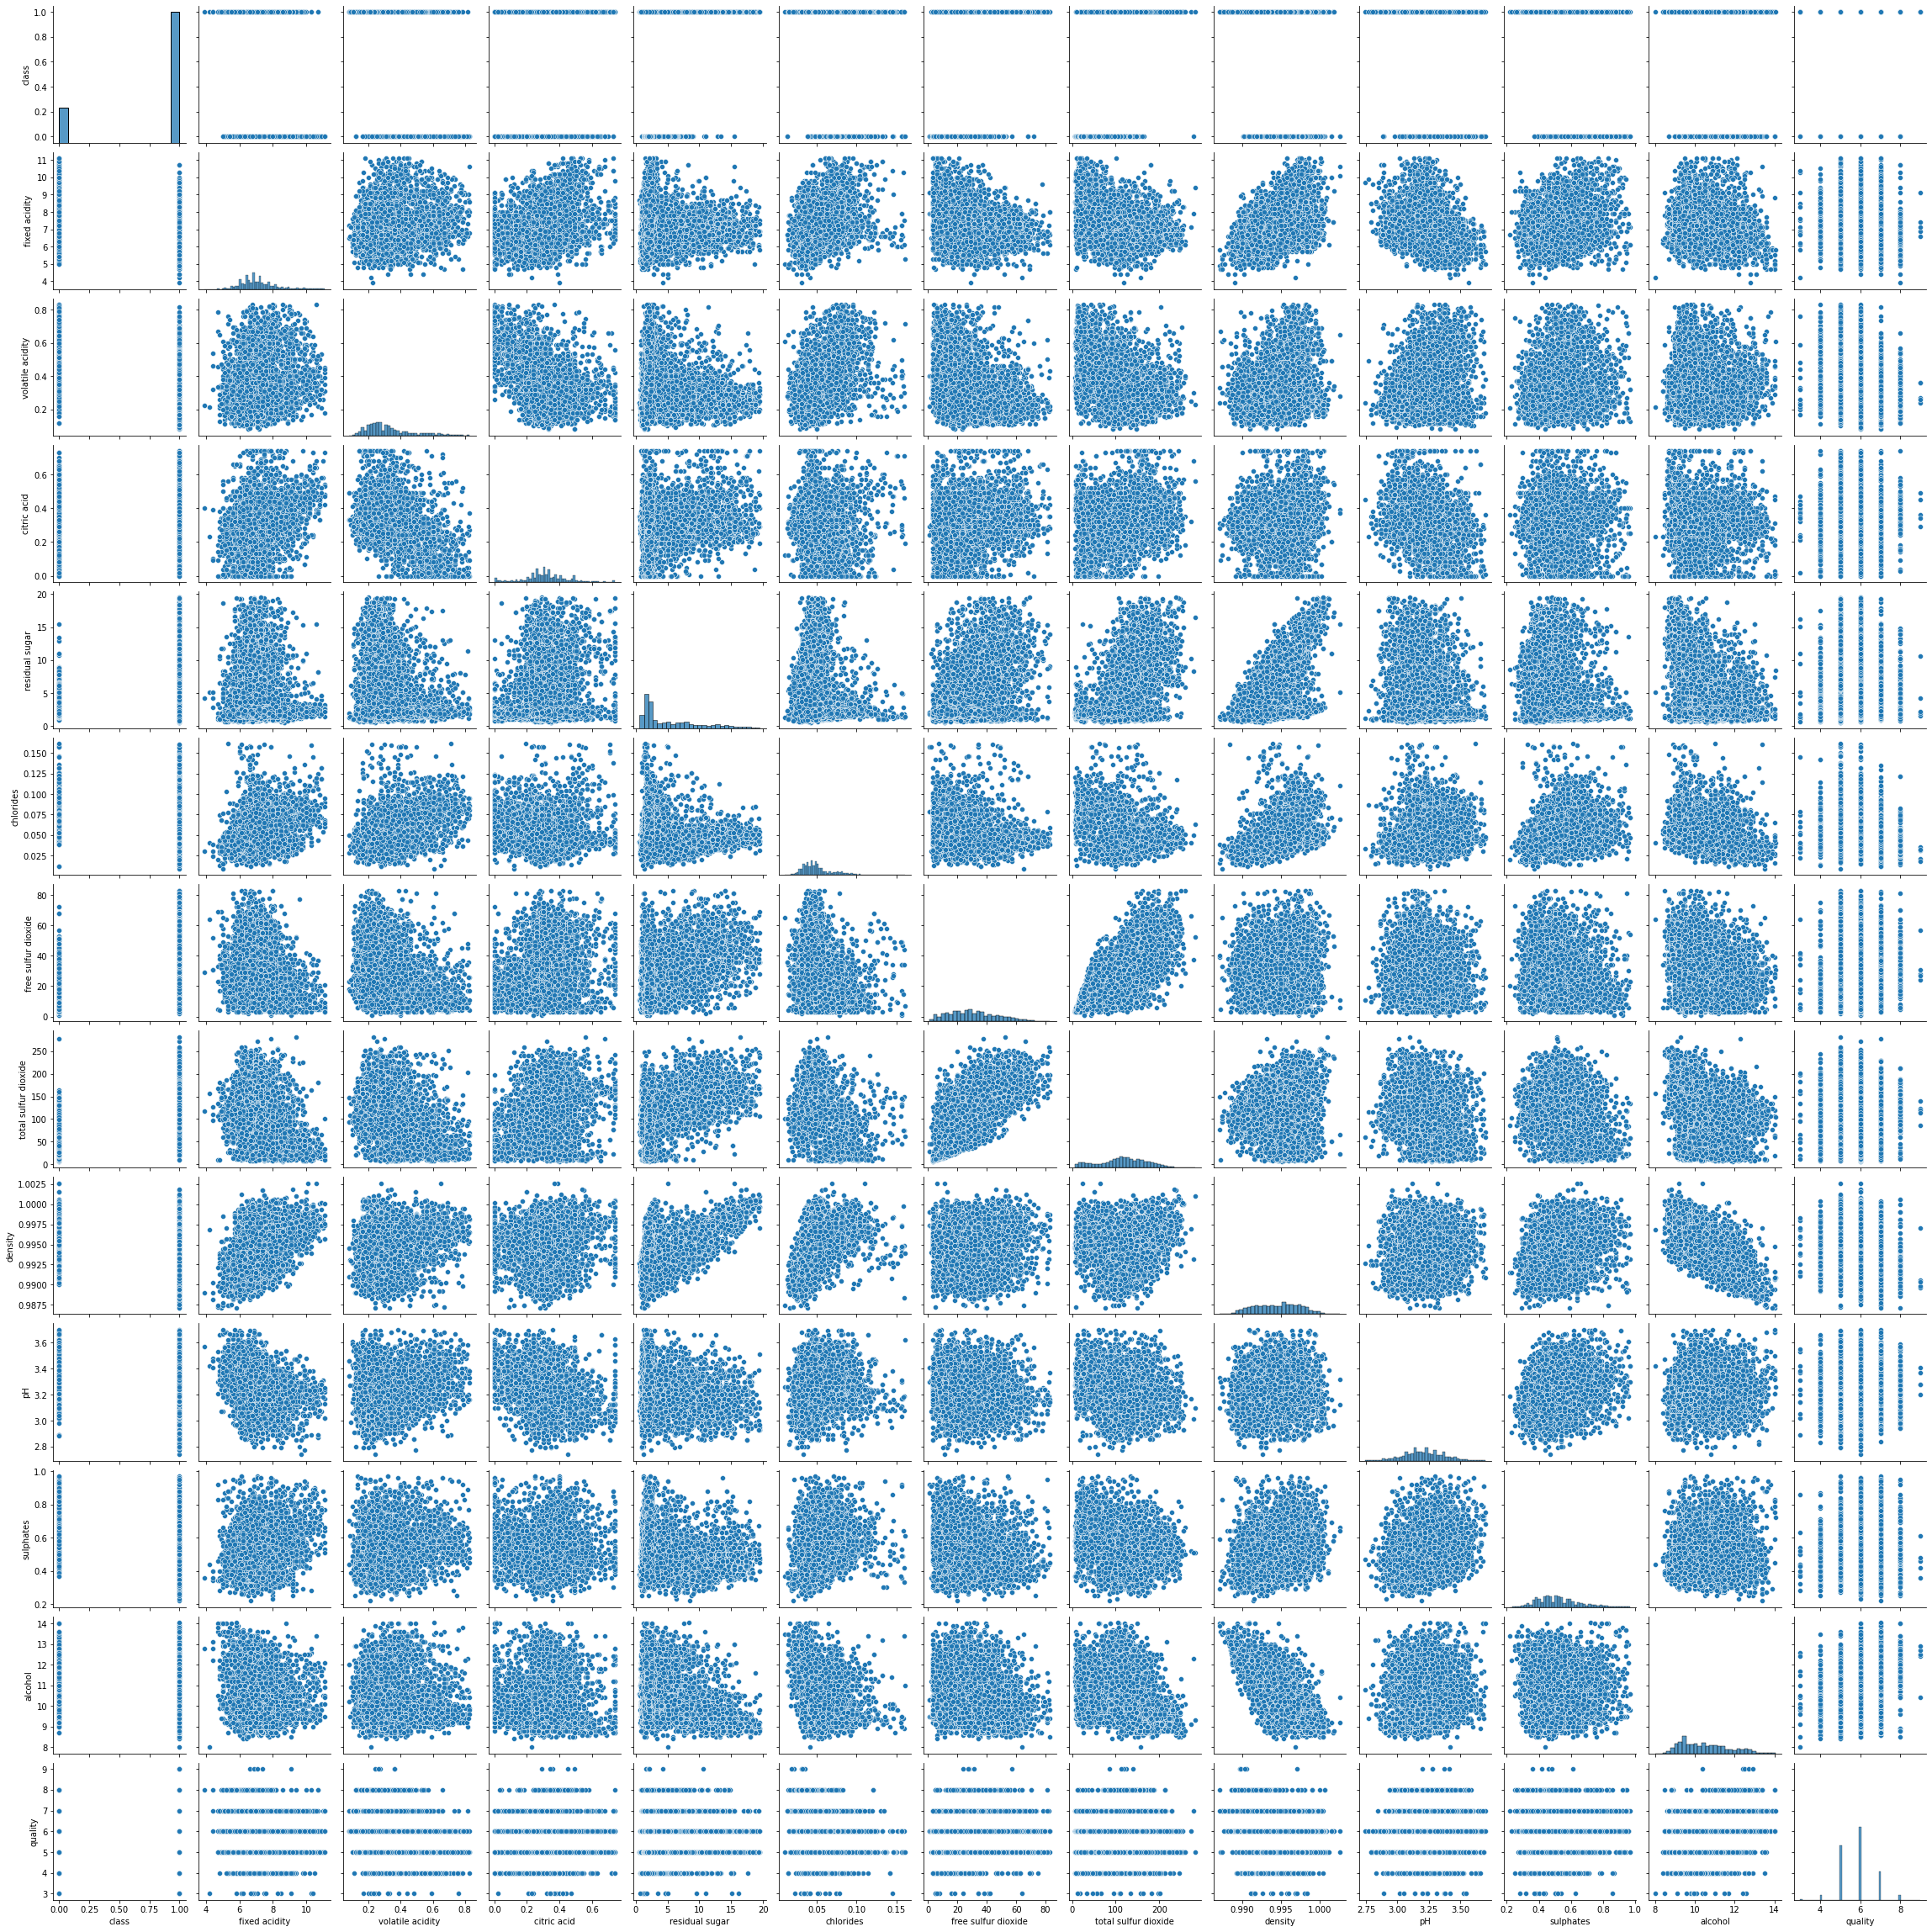

In [ ]:
sns.pairplot(data=df_)

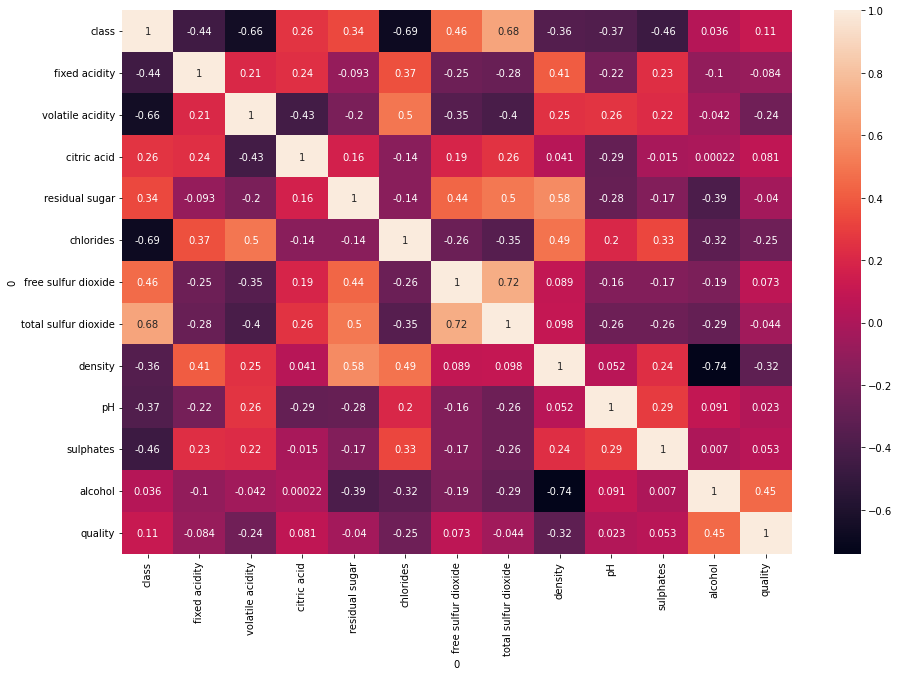

In [ ]:
corr_matrix2 = df_.corr(method ='pearson')
sns.heatmap(data = corr_matrix2, annot = True)

# Деревья для df по типу вина (белое-красное), а также деревья и линейный дискриминант для df_ (без выбросов).

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree

Верно определенные ко всем train: 0.9896073903002309
Верно определенные ко всем test : 0.9751523675574308


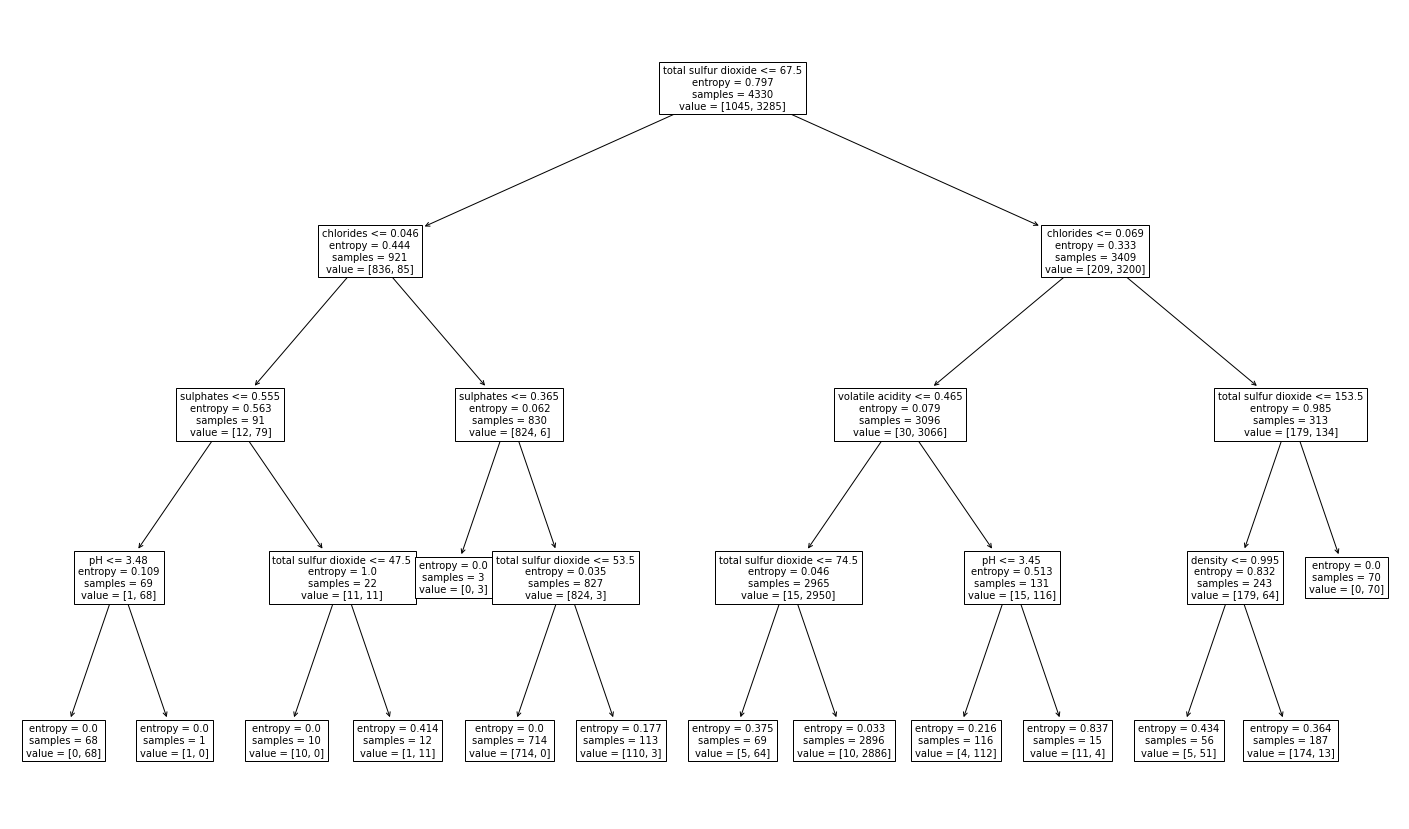

In [ ]:
X = df.drop(['class'], axis = 1)
y = df['class']

depth = 4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 1337)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth, random_state = 1337).fit(X_train, y_train)

print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')

plt.figure(figsize = (25, 15))
export_graphviz(clf, filled=True)
tree.plot_tree(clf, fontsize = 10, feature_names = X.columns)
plt.show()

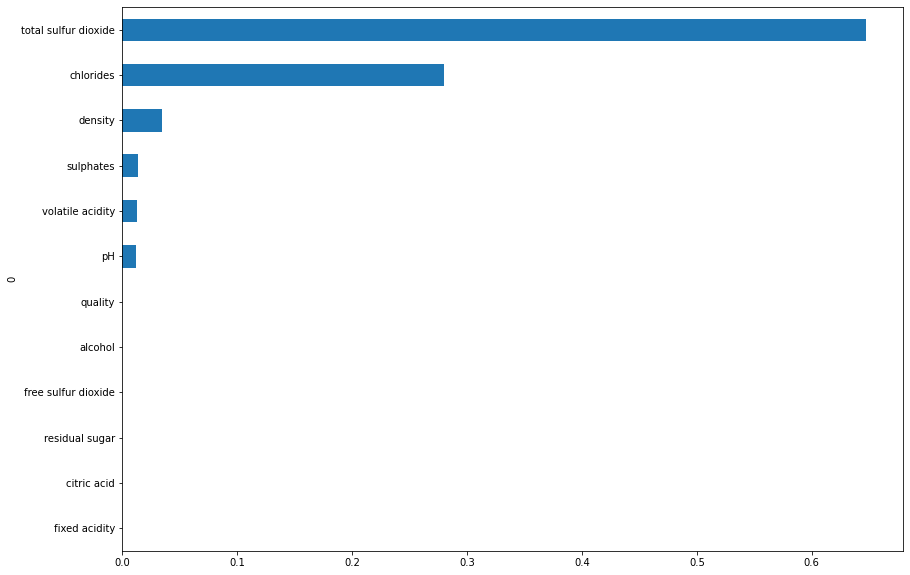

In [ ]:
pd.Series(clf.feature_importances_, index = X.columns).sort_values().plot(kind = 'barh', fontsize = 10, figsize = (14, 10))

In [ ]:
# Дерево на таблице с дропнутыми данными выбросов.
X = df_.drop(['class'], axis = 1)
y = df_['class']

depth = 4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 1337)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth, random_state = 1337).fit(X_train, y_train)

print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')

Верно определенные ко всем train: 0.988508618536098
Верно определенные ко всем test : 0.9827586206896551


In [ ]:
# Линейный дискриминант.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis().fit(X_train, y_train)

print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')

Верно определенные ко всем train: 0.9960029977516862
Верно определенные ко всем test : 0.9964503042596349


# Смотрим решение задачи, когда класс - качество вина.

In [ ]:
# Поменяли качество и тип вина местами.
df2 = df_with_dummies.copy()
df['class'  ] = df2['quality']
df['quality'] = df2['class'  ]
df.rename({'quality' : 'wine type'}, axis = 1, inplace = True)
df

<ipython-input-21-4910c50fff76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'  ] = df2['quality']
<ipython-input-21-4910c50fff76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df2['class'  ]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

0     class  fixed acidity  volatile acidity  citric acid  residual sugar  \
1       6.0            7.0             0.270         0.36            20.7   
2       6.0            6.3             0.300         0.34             1.6   
3       6.0            8.1             0.280         0.40             6.9   
4       6.0            7.2             0.230         0.32             8.5   
5       6.0            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    6.0            6.8             0.620         0.08             1.9   
6493    5.0            6.2             0.600         0.08             2.0   
6495    6.0            6.3             0.510         0.13             2.3   
6496    5.0            5.9             0.645         0.12             2.0   
6497    6.0            6.0             0.310         0.47             3.6   

0     chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1         0.045                 45.0                 170.0  1.00100  3.00   
2         0.049                 14.0                 132.0  0.99400  3.30   
3         0.050                 30.0                  97.0  0.99510  3.26   
4         0.058                 47.0                 186.0  0.99560  3.19   
5         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.068                 28.0                  38.0  0.99651  3.42   
6493      0.090                 32.0                  44.0  0.99490  3.45   
6495      0.076                 29.0                  40.0  0.99574  3.42   
6496      0.075                 32.0                  44.0  0.99547  3.57   
6497      0.067                 18.0                  42.0  0.99549  3.39   

0     sulphates  alcohol  wine type  
1          0.45      8.8          1  
2          0.49      9.5          1  
3          0.44     10.1          1  
4          0.40      9.9          1  
5          0.40      9.9          1  
...         ...      ...        ...  
6492       0.82      9.5          0  
6493       0.58     10.5          0  
6495       0.75     11.0          0  
6496       0.71     10.2          0  
6497       0.66     11.0          0  

[6463 rows x 13 columns]

In [ ]:
# Смотрим на деревья + другие метрики.
X = df.drop(['class'], axis = 1)
y = df['class']

depth = 4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 1337)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth, random_state = 1337).fit(X_train, y_train)

print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')
print(classification_report(y_test, clf.predict(X_test)))

Верно определенные ко всем train: 0.5491916859122402
Верно определенные ко всем test : 0.5419596812001876
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00        71
         5.0       0.58      0.60      0.59       689
         6.0       0.53      0.65      0.58       934
         7.0       0.54      0.35      0.42       371
         8.0       0.22      0.11      0.14        57
         9.0       0.00      0.00      0.00         3

    accuracy                           0.54      2133
   macro avg       0.27      0.24      0.25      2133
weighted avg       0.52      0.54      0.52      2133



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


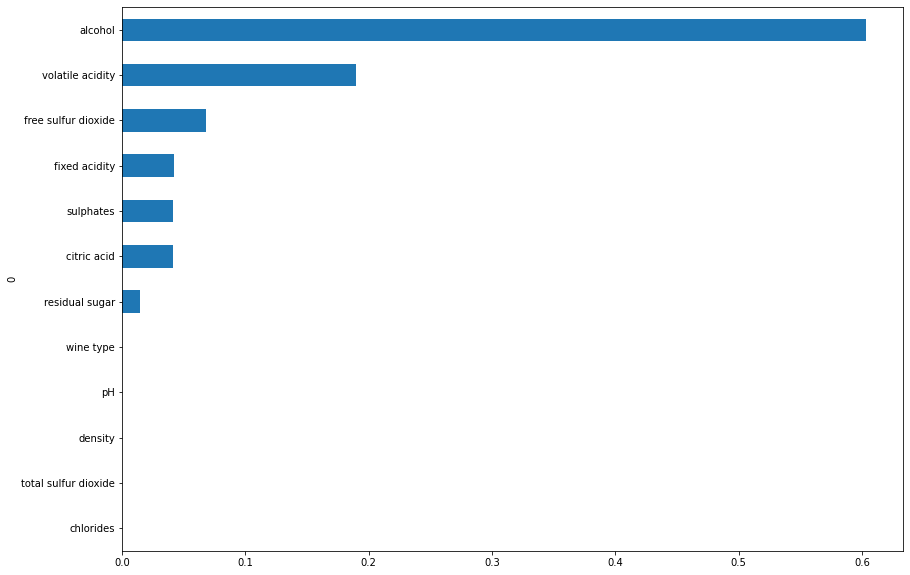

In [ ]:
# Как и ожидалось, алкоголь – лучший признак (из матрицы ковариации).
pd.Series(clf.feature_importances_, index = X.columns).sort_values().plot(kind = 'barh', fontsize = 10, figsize = (14, 10)) 

# Смотрим отсеивание фич, ищем "оптимальные" параметры для обучения на деревьях. Метод k - соседей.

In [ ]:
# Ищем фичи с малой кореляцией.
useless_features = []
for i in range(0, len(corr_matrix['quality'])):
    if np.absolute(corr_matrix['quality'][i]) < 0.1:
        useless_features.append(corr_matrix.columns[i])
print(corr_matrix['quality'], useless_features)

0
class                   0.119185
fixed acidity          -0.076174
volatile acidity       -0.266677
citric acid             0.084926
residual sugar         -0.034654
chlorides              -0.200553
free sulfur dioxide     0.054924
total sulfur dioxide   -0.041598
density                -0.304447
pH                      0.018403
sulphates               0.039054
alcohol                 0.444637
quality                 1.000000
Name: quality, dtype: float64 ['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates']


In [ ]:
# Смотрим решение с дропнутыми параметрами.
df_drop = df.drop(useless_features, axis = 1)
X = df_drop.drop(['class'], axis = 1)
y = df_drop['class']

depth = 4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 1337)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth, random_state = 1337).fit(X_train, y_train)

print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')
print(classification_report(y_test, clf.predict(X_test)))
# Решение немного ухудшилось, выкинутые параметры не сильно меняют решение.

Верно определенные ко всем train: 0.5471131639722864
Верно определенные ко всем test : 0.5382090951711205
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00        71
         5.0       0.57      0.69      0.63       689
         6.0       0.51      0.67      0.58       934
         7.0       0.59      0.13      0.21       371
         8.0       0.00      0.00      0.00        57
         9.0       0.00      0.00      0.00         3

    accuracy                           0.54      2133
   macro avg       0.24      0.21      0.20      2133
weighted avg       0.51      0.54      0.49      2133



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Поиск оптимальных параметров к деревьям.
from sklearn.ensemble import GradientBoostingClassifier

# count_trees = 85
# rate = 0.05
# depth = 9

rate_list = [x / 1000.0 for x in range(50, 950, 50)]
best_result = 0
best_param = []

# Всего 10 классов => минимальная глубина 4.
for depth in range(4, 10):
    for count_trees in range(5, 100, 10):
        for rate in rate_list:
            clf = GradientBoostingClassifier(n_estimators = count_trees, learning_rate = rate, max_depth = depth).fit(X_train, y_train)
            if clf.score(X_test , y_test ) > best_result:
                best_result = clf.score(X_test , y_test )
                best_param = [depth, count_trees, rate]

# print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
# print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')
print("best result = " + str(best_result), best_param)
# best result = 0.6319737458977965 [9, 85, 0.05]

best result = 0.6319737458977965 [9, 85, 0.05]


In [ ]:
# Смотрим результаты для параметров, близких к оптимальным, но со всеми фичами.
X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis = 1), df['class'], test_size = 0.33, shuffle = True, random_state = 1337)
clf = GradientBoostingClassifier(n_estimators = 85, learning_rate = 0.04, max_depth = 9).fit(X_train, y_train)
print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')
print(f'Наш score                       : {score_(y_test, clf.predict(X_test))}')
print(classification_report(y_test, clf.predict(X_test)))
# Учет всех признаков дает немногим лучшее распознавание.

Верно определенные ко всем train: 0.997459584295612
Верно определенные ко всем test : 0.6432255039849977
Наш score                       : 0.9554617909048289
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.44      0.15      0.23        71
         5.0       0.67      0.68      0.67       689
         6.0       0.63      0.74      0.68       934
         7.0       0.68      0.51      0.59       371
         8.0       0.43      0.26      0.33        57
         9.0       0.00      0.00      0.00         3

    accuracy                           0.64      2133
   macro avg       0.41      0.34      0.36      2133
weighted avg       0.64      0.64      0.63      2133



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# То же самое для таблицы без выбросов. Получаем лучшее решение.
df2 = df_.copy()
df_['class'  ] = df2['quality']
df_['quality'] = df2['class'  ]
df_.rename({'quality' : 'wine type'}, axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(df_.drop(['class'], axis = 1), df_['class'], test_size = 0.33, shuffle = True, random_state = 1337)
clf = GradientBoostingClassifier(n_estimators = 85, learning_rate = 0.04, max_depth = 9).fit(X_train, y_train)
print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')
print(f'Наш score                       : {score_(y_test, clf.predict(X_test))}')
print(classification_report(y_test, clf.predict(X_test)))

Верно определенные ко всем train: 0.9987509367974019
Верно определенные ко всем test : 0.6658215010141988
Наш score                       : 0.9594320486815415
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.59      0.16      0.25        63
         5.0       0.68      0.72      0.70       632
         6.0       0.65      0.73      0.69       878
         7.0       0.70      0.56      0.62       340
         8.0       0.66      0.35      0.46        54
         9.0       0.00      0.00      0.00         2

    accuracy                           0.67      1972
   macro avg       0.47      0.36      0.39      1972
weighted avg       0.67      0.67      0.66      1972



In [ ]:
def score_2(y, pred):
    right = 0
    near_to_right = 0
    not_right = 0

    for i in range(len(y)):
        if np.abs(y.iloc[i] - pred[i]) == 0:
            right += 1
        if np.abs(y.iloc[i] - pred[i]) == 1:
            near_to_right += 1
        if np.abs(y.iloc[i] - pred[i]) > 1:
            not_right += 1
    return right / len(y), near_to_right / len(y), not_right / len(y)

In [ ]:
print(score_2(y_test, clf.predict(X_test)))

(0.6658215010141988, 0.2936105476673428, 0.04056795131845842)


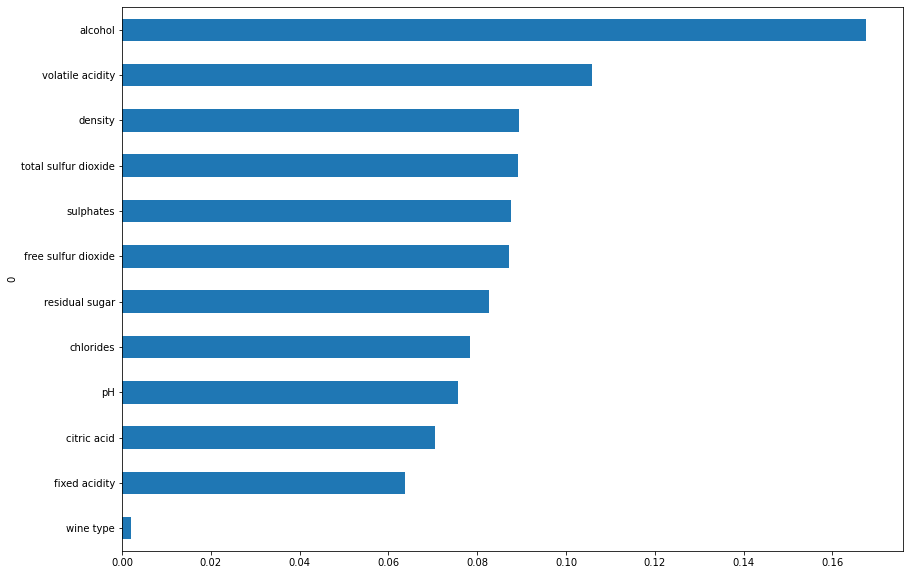

In [ ]:
pd.Series(clf.feature_importances_, index = df.drop(['class'], axis = 1).columns).sort_values().plot(kind = 'barh', fontsize = 10, figsize = (14, 10))

In [ ]:
# Метод ближайшик k соседей.
from sklearn.neighbors import KNeighborsClassifier

# neighb = 5
# p_mink_param = 5 # p > 1
alg = ['auto', 'ball_tree', 'kd_tree', 'brute']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 1337)
# clf = KNeighborsClassifier(n_neighbors = neighb, algorithm = alg[2], p = p_mink_param).fit(X_train, y_train)

# print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
# print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')

best_result = 0
best_param = []

for _alg in alg:
    for neighb in range(2, 10):
        for p_mink_param in range(1, 10):
            clf = KNeighborsClassifier(n_neighbors = neighb, algorithm = _alg, p = p_mink_param).fit(X_train, y_train)
            if clf.score(X_test , y_test ) > best_result:
                best_result = clf.score(X_test , y_test )
                best_param = [_alg, neighb, p_mink_param]

print("Метод ближайших к соседей, accuracy =", best_result, ", алгоритм", best_param[0], ", количество соседей ", best_param[1], ", параметр метрики Минковского", best_param[2])
# Метод ближайших к соседей, accuracy= 0.5241443975621191 , алгоритм auto , количество соседей  8 , параметр метрики Минковского 1

Метод ближайших к соседей, accuracy = 0.5241443975621191 , алгоритм auto , количество соседей  8 , параметр метрики Минковского 1


# микроВыводы: 
# Данные расположены хаотично, буквально в перемешку, об этом можно судить по качеству решения при помощи деревьев и при помощи k-соседей. Последние, в свою очередь, дают результат значительно хуже, чем деревья, все по той же причине.

In [ ]:
# Обновляем таблицы заново, чтобы не запускать весь предыдущий код.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/winequalityN.csv', header = None)
Columns = df.iloc[0]
Columns[0] = 'class'
df = df.set_axis(Columns, axis = 1, inplace = False)
df = df.drop([0]) # Дропнули столбец с названиями.

df['class'] = sklearn.preprocessing.LabelEncoder().fit_transform(df['class']) 

df2 = df.copy()
df['class'  ] = df2['quality']
df['quality'] = df2['class'  ]
df.rename({'quality' : 'wine type'}, axis = 1, inplace = True)

for i in df.columns:
    if i != 'wine type':
        df[i] = df[i].astype(float)
    if i == 'class':
        df[i] = df[i].astype(int)
df = df.dropna()
df_without_drops = df.copy()
z = np.abs(stats.zscore(df.drop('class', axis = 1)))
df = df[(z < 3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 2 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 5975 non-null   int64  
 1   fixed acidity         5975 non-null   float64
 2   volatile acidity      5975 non-null   float64
 3   citric acid           5975 non-null   float64
 4   residual sugar        5975 non-null   float64
 5   chlorides             5975 non-null   float64
 6   free sulfur dioxide   5975 non-null   float64
 7   total sulfur dioxide  5975 non-null   float64
 8   density               5975 non-null   float64
 9   pH                    5975 non-null   float64
 10  sulphates             5975 non-null   float64
 11  alcohol               5975 non-null   float64
 12  wine type             5975 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 653.5 KB


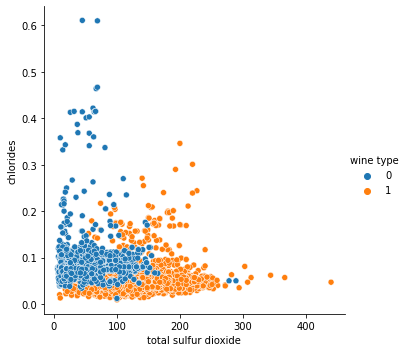

In [ ]:
sns.relplot(data = df_without_drops, x = "total sulfur dioxide", y = "chlorides", hue = "wine type")

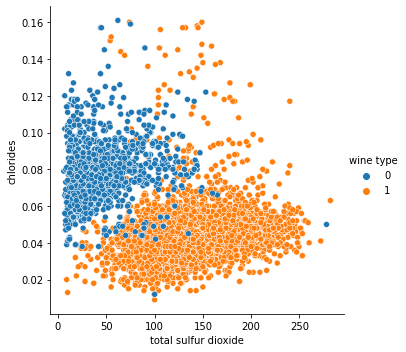

In [ ]:
sns.relplot(data = df, x = "total sulfur dioxide", y = "chlorides", hue = "wine type")

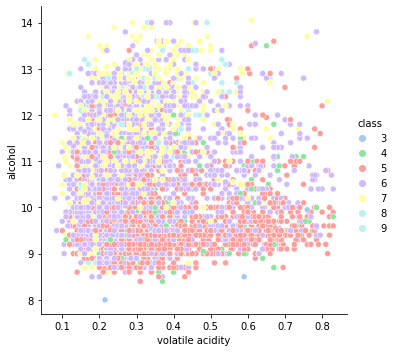

In [ ]:
sns.relplot(data = df, x = "volatile acidity", y = "alcohol", hue = "class", palette = sns.color_palette(['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0', '#b9f2f0'])) 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

X = df.drop(['class'], axis = 1)
y = df['class']

depth = 4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 1337)

models = [
    LinearDiscriminantAnalysis(solver = "svd", store_covariance = True), # Линейный дискриминант.
    QuadraticDiscriminantAnalysis() # Квадратный дискриминант.
    # LogisticRegression() # Логистическая регрессия.
    ]

names = ['Линейный дискриминант', 'Квадратный дискриминант', 'Логистическая регрессия']

j = 0;
for clf in models:
    clf.fit(X, y)
    print(names[j])
    j += 1
    print(f'Верно определенные ко всем train: {clf.score(X_train, y_train)}')
    print(f'Верно определенные ко всем test : {clf.score(X_test , y_test )}')
    print(f'Наш score                       : {score_(y_test, clf.predict(X_test))}')
    print(classification_report(y_test, clf.predict(X_test)))
    print()

Линейный дискриминант
Верно определенные ко всем train: 0.5380964276792406
Верно определенные ко всем test : 0.552738336713996
Наш score                       : 0.9482758620689655
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.54      0.11      0.18        63
           5       0.61      0.60      0.60       632
           6       0.54      0.69      0.60       878
           7       0.48      0.31      0.37       340
           8       0.00      0.00      0.00        54
           9       0.00      0.00      0.00         2

    accuracy                           0.55      1972
   macro avg       0.31      0.24      0.25      1972
weighted avg       0.53      0.55      0.53      1972


Квадратный дискриминант
Верно определенные ко всем train: 0.5400949288033975
Верно определенные ко всем test : 0.5608519269776876
Наш score                       : 0.9513184584178499
              precision    recall  f1-s

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysi